In [36]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the ImageDataGenerator object
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
) 

# Generate batches and augment the images
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    directory='Food-5K/training/',
    x_col='filename',
    y_col='label',
    class_mode='binary',
    target_size=(224, 224),
)

val_generator = train_datagen.flow_from_dataframe(
    df_val,
    directory='Food-5K/validation/',
    x_col='filename',
    y_col='label',
    class_mode='binary',
    target_size=(224, 224),
)

Found 3000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


In [8]:
from tensorflow.keras.applications import ResNet50

# Initialize the Pretrained Model
feature_extractor = ResNet50(weights='imagenet', 
                             input_shape=(224, 224, 3),
                             include_top=False)

# Set this parameter to make sure it's not being trained
feature_extractor.trainable = False

# Set the input layer
input_ = tf.keras.Input(shape=(224, 224, 3))

# Set the feature extractor layer
x = feature_extractor(input_, training=False)

# Set the pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Set the final layer with sigmoid activation function
output_ = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the new model object
model = tf.keras.Model(input_, output_)

# Compile it
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Print The Summary of The Model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [9]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [11]:
model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
94/94 [==============================] - 176s 2s/step - loss: 0.1138 - accuracy: 0.9613 - val_loss: 0.1097 - val_accuracy: 0.9580
Epoch 2/10
94/94 [==============================] - 178s 2s/step - loss: 0.0881 - accuracy: 0.9697 - val_loss: 0.0857 - val_accuracy: 0.9740
Epoch 3/10
94/94 [==============================] - 177s 2s/step - loss: 0.0682 - accuracy: 0.9753 - val_loss: 0.0812 - val_accuracy: 0.9730
Epoch 4/10
94/94 [==============================] - 176s 2s/step - loss: 0.0636 - accuracy: 0.9790 - val_loss: 0.0746 - val_accuracy: 0.9720
Epoch 5/10
94/94 [==============================] - 177s 2s/step - loss: 0.0547 - accuracy: 0.9820 - val_loss: 0.0764 - val_accuracy: 0.9760
Epoch 6/10
94/94 [==============================] - 187s 2s/step - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.0653 - val_accuracy: 0.9780
Epoch 7/10
94/94 [==============================] - 206s 2s/step - loss: 0.0461 - accuracy: 0.9840 - val_loss: 0.0655 - val_accuracy: 0.9750
Epoch 8/10
94

In [49]:
from PIL import Image

In [ ]:
model = tf.keras.models.load_model('./resnet50_food_model')

In [ ]:
model.save('./resnet50_food_model')

In [2]:
model = tf.keras.models.load_model('./resnet50_food_model')

In [ ]:
from PIL import Image


In [3]:
from PIL import Image

In [4]:
image_path = 'Food-5k/evaluation/'

In [17]:
#os.listdir(image_path)

In [7]:
img = Image.open(image_path +'0_0.jpg')

In [18]:
#Image.open(image_path +'1_2.jpg')

In [19]:

#Image.open(image_path +'0_2.jpg')

# model predictions

In [ ]:
img = mpimg.imread('your_image.png')
imgplot = plt.imshow(img)
plt.show()

In [32]:
def predict_image(image_path):
    img = Image.open(image_path)
    print(img)
    img = img.resize((224, 224))
    img = np.array(img)
    img = np.expand_dims(img, 0)
    pred = model.predict(img)
    print(pred)
    if pred > 0.5:
        print(pred)
        print('It is a food image')
    else:
        print('It is a non-food image')

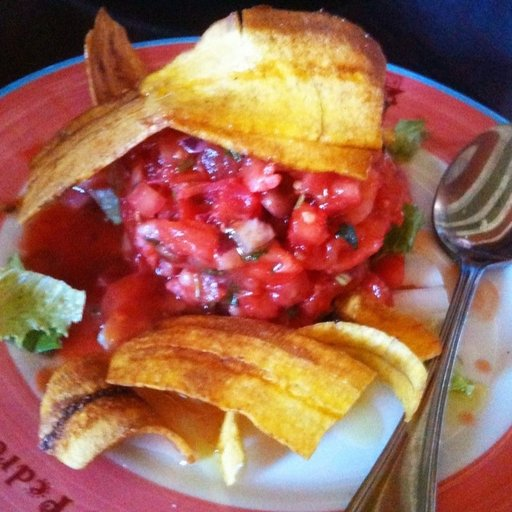

In [42]:
Image.open('Food-5k/evaluation/1_2.jpg')#.to_thumb(256,256)

In [43]:
predict_image('Food-5k/evaluation/1_1.jpg')

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x384 at 0x11235F02130>
[[0.9996635]]
[[0.9996635]]
It is a food image


In [34]:
predict_image('Food-5k/evaluation/0_1.jpg')

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x360 at 0x11235E0F370>
[[4.9039478e-05]]
It is a non-food image


In [35]:
predict_image('Food-5k/evaluation/0_2.jpg')

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x1123114ED00>
[[0.0017226]]
It is a non-food image


In [23]:
predict_image('Food-5k/evaluation/0_2.jpg')

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x11235E16100>
It is a food image


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = []
y_pred = []

for i in os.listdir('Food-5K/evaluation'):
    img = Image.open('Food-5K/evaluation/' + i)
    img = img.resize((224, 224))
    img = np.array(img)
    img = np.expand_dims(img, 0)
    
    y_true.append(int(i.split('_')[0]))
    y_pred.append(1 if model.predict(img) > 0.5 else 0)
    
print(classification_report(y_true, y_pred))
print()
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       500
           1       0.97      0.98      0.98       500

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000


[[485  15]
 [  9 491]]
